In [63]:

import os
import pandas as pd
from config import BASE_DIR

domain = "dss"
exp_name = "gae_init"
BASELINE_DIR = f"{BASE_DIR}/experiments/{domain}/cross_validation/baselines"
BASELINE_GNN_DIR = f"{BASE_DIR}/experiments/{domain}/cross_validation/gnn/{exp_name}"


In [64]:



def list_files(dir):
    filenames = []
    for root, dirs, files in os.walk(dir):
        for file in files:
            filenames.append(file)
    return filenames


print(list_files(BASELINE_DIR))
print(list_files(BASELINE_GNN_DIR))

['composition_unsupervised.csv']
['gae_init_composition_2_adj_types.csv']


In [65]:
task_by_domain = {"dss": ["book", "composition", "section"], "bible": ["book"]}
tasks = task_by_domain[domain]
if domain == "dss":
    tasks.remove("section")
    tasks.remove("book")
    
gnn_name_fomrat = "{}_{}_2_adj_types.csv"

COMPARISON_SCHEME = ["task", "vectorizer", "model", "silhouette", 
                     "clustering_accuracy", 
                     "jaccard", "dasgupta",
                     "hidden_dim", "adj_type", "iter"]

compare_list = {
    task: [
        f"{BASELINE_DIR}/{task}_unsupervised.csv",
        f"{BASELINE_GNN_DIR}/{gnn_name_fomrat.format(exp_name, task)}"
    ]
    for task in tasks
}

In [66]:
gnn = pd.read_csv(compare_list["composition"][1])
gnn.sort_values(by=["jaccard"],ascending=False)

,silhouette,jaccard,dasgupta,clustering_accuracy,auc,ap,epoch,num_adjs,epochs,hidden_dim,latent_dim,distance,learning_rate,threshold,bert_model,adj_type,num_edges,iter
24,0.231469,0.290377,0.875157,0.501726,0.948925,0.935349,1,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,7553,4
36,0.233317,0.277284,0.877032,0.485482,0.951944,0.938973,1,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,7415,6
54,0.229212,0.272634,0.890545,0.489583,0.952720,0.940564,1,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,7466,9
26,0.218089,0.268120,0.854421,0.493671,0.921921,0.898760,1,2,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf & trigram,10847,4
20,0.217275,0.263907,0.880654,0.490783,0.927029,0.904246,1,2,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf & trigram,10852,3
0,0.231675,0.263299,0.884113,0.478009,0.949514,0.936468,1,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,7466,0
32,0.212990,0.260519,0.878799,0.482639,0.925534,0.905541,1,2,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf & trigram,10676,5
30,0.218476,0.259752,0.878251,0.495370,0.941651,0.927823,1,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,7466,5
25,0.192277,0.259680,0.848847,0.463751,0.947602,0.932129,2,1,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,trigram,7553,4
8,0.219647,0.255291,0.877021,0.492468,0.926863,0.912390,2,2,50,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf & trigram,10619,1


In [67]:

def generate_all_results(compare_list, tasks, main_metric):
    results = []
    for task in tasks:
        baseline = pd.read_csv(compare_list[task][0])
        baseline["task"] = task
        baseline["adj_type"] = None
        baseline["hidden_dim"] = None
        baseline["model"] = "Only Embeddings"
        baseline = baseline.rename(columns={"vectorizer_type": "vectorizer"})
        results.append(baseline[COMPARISON_SCHEME].to_dict(orient="records"))

        gnn = pd.read_csv(compare_list[task][1])
        gnn = gnn.rename(columns={"bert_model": "vectorizer_type"})
        gnn = gnn[gnn["hidden_dim"]==300]
        gnn = gnn[gnn["num_adjs"]==2]
        gnn["model"] = "GVAE"
        gnn["task"] = task
        gnn = gnn.rename(columns={"vectorizer_type": "vectorizer"})
        gnn["model"] = "GAE"
        gnn["task"] = task

        results.append(gnn[COMPARISON_SCHEME].to_dict(orient="records"))
        # max_idx = gnn.groupby('vectorizer')[main_metric].idxmax()
        # max_test_acc_rows = gnn.loc[max_idx]
        # max_test_acc_rows["model"] = "GVAE"
        # max_test_acc_rows["task"] = task
        # results.append(max_test_acc_rows[COMPARISON_SCHEME].to_dict(orient="records"))

    all_results = pd.DataFrame([item for sublist in results for item in sublist])
    all_results = all_results.sort_values(by=main_metric, ascending=False)
    return all_results


In [68]:

def get_group_by_vectorizer(i):
    if "yonatanlou" in i:
        return 'fine_tuned'
    elif "dicta" in i or "onlplab" in i:
        return 'pre_trained_bert'
    else:
        return 'classic_text_features'


def generate_color_map(df, col, group_name, base_color="PuOr", base_color_by_group=None):
    groups = df.groupby(group_name)[col].apply(list).to_dict()
    num_groups = df[col].nunique()
    all_colors = list(sns.color_palette(base_color, num_groups))
    color_map = {}
    i = 0
    if not base_color_by_group:
        for group, items in groups.items():
            items = list(set(items))

            for item in items:
                color_map[item] = all_colors[i]
                i += 1
        return color_map

    # Function to generate shades of a base color
    def generate_shades(base_color, num_shades):
        # return sns.hls_palette(num_shades, h=base_color, l=0.5, s=0.5)

        return sns.color_palette(base_color, n_colors=num_shades + 1)

    # Create the color map
    color_map = {}
    for group, items in groups.items():
        shades = generate_shades(base_color_by_group[group], len(items))
        for item, shade in zip(items, shades):
            color_map[item] = shade
    return color_map





In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def generate_bar_plot(all_results, x_col, y_col, hue_col, vectorizer_type_col, color_map, filename,
                      which_hue_cols=False, base_color_by_group=None):
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(nrows=len(all_results['task'].unique()), ncols=1,
                             figsize=(12, 6 * len(all_results['task'].unique())), sharey=False)
    all_results['task'] = all_results['task'].replace("section", "sectarian")

    # Create a custom order based on base_color_by_group
    if base_color_by_group:
        custom_order = []
        for group in base_color_by_group.keys():
            group_items = all_results[all_results['vectorizer_type'] == group][hue_col].unique()
            custom_order.extend(group_items)
    else:
        custom_order = None

    # Generate colors for each group
    if base_color_by_group:
        group_colors = {}
        for group, cmap_name in base_color_by_group.items():
            cmap = plt.get_cmap(cmap_name)
            group_colors[group] = cmap(0.6)  # Use a specific point in the colormap

    for i, task in enumerate(all_results['task'].unique()):
        # Filter data for the current task
        task_data = all_results[all_results['task'] == task]
        if which_hue_cols is not None:
            task_data = task_data[task_data[hue_col].isin(which_hue_cols)]

        # Sort the data according to the custom order
        if custom_order:
            task_data[hue_col] = pd.Categorical(task_data[hue_col], categories=custom_order, ordered=True)
            task_data = task_data.sort_values(hue_col)

        # Create the plot with sorted bars
        ax = axes[i] if len(all_results['task'].unique()) > 1 else axes
        sns.barplot(ax=ax, x=x_col, y=y_col, hue=hue_col, data=task_data, palette=color_map, hue_order=custom_order)
        # sns.boxplot(ax=ax, x=x_col, y=y_col, hue=hue_col, data=task_data, palette=color_map, hue_order=custom_order)
        ax.set_title(f'{y_col.capitalize()} Metric By {hue_col.capitalize()} For {task.capitalize()} Clustering ({domain.capitalize()})', fontsize=16)

        # Adjusting the y-axis limits
        min_y_col = task_data[y_col].min()
        max_y_col = task_data[y_col].max()
        padding = (max_y_col - min_y_col) * 0.1
        ax.set_ylim(min_y_col - padding, max_y_col + padding)

        ax.set_xlabel('Model', fontsize=14)
        ax.set_ylabel(y_col, fontsize=14)
        ax.tick_params(axis='x', rotation=45)

        # Customize legend
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, title='Vectorizer', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        ax.grid(alpha=0.5)

    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

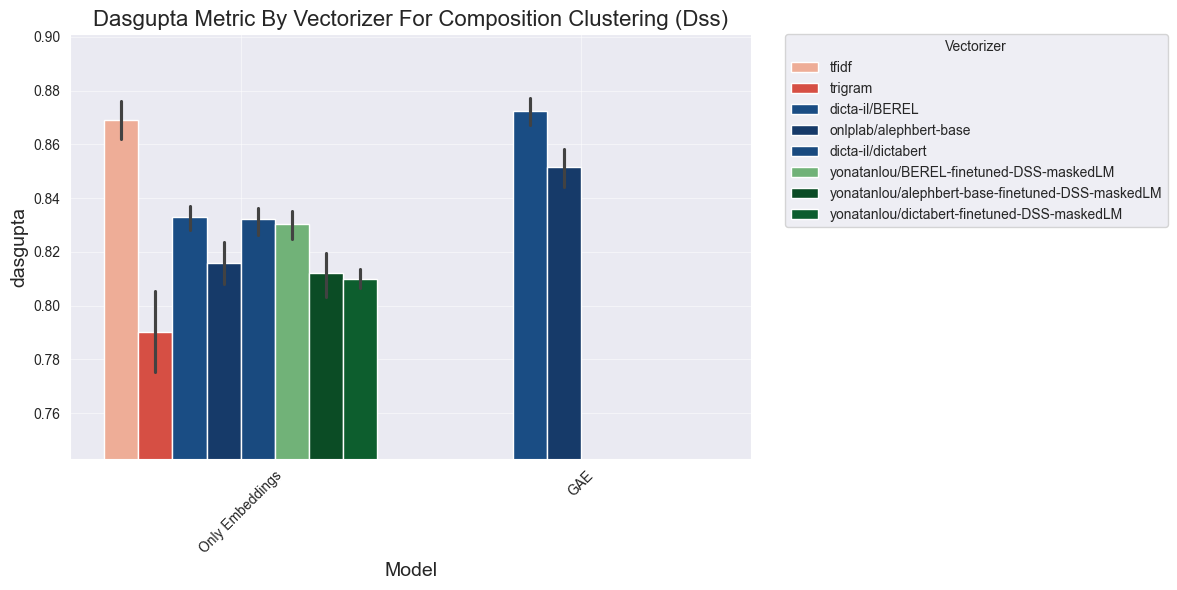

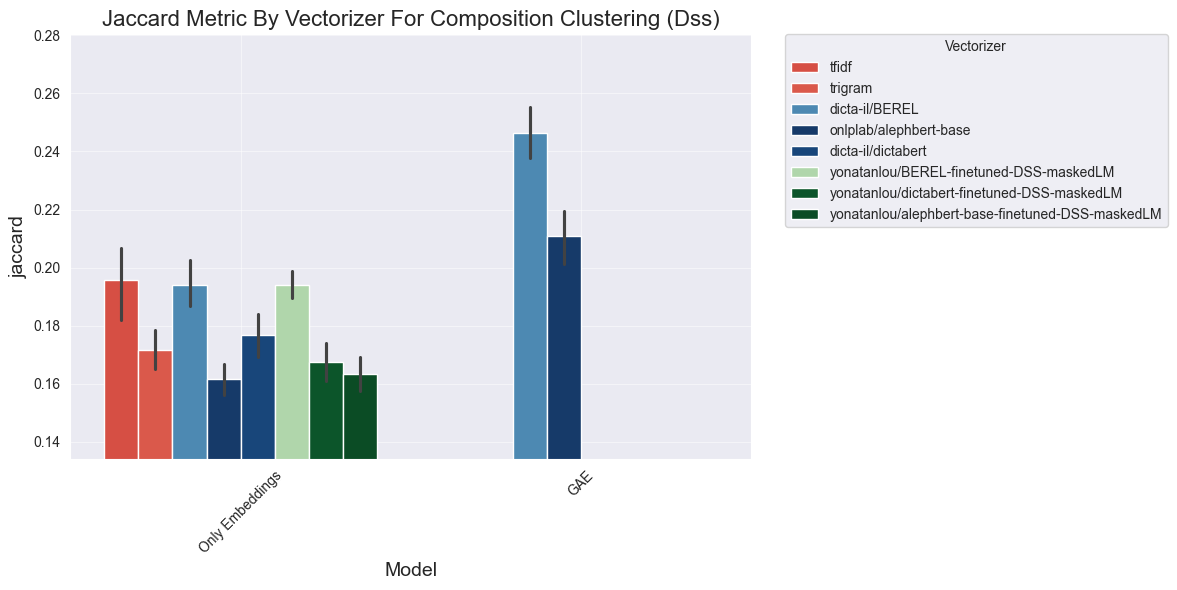

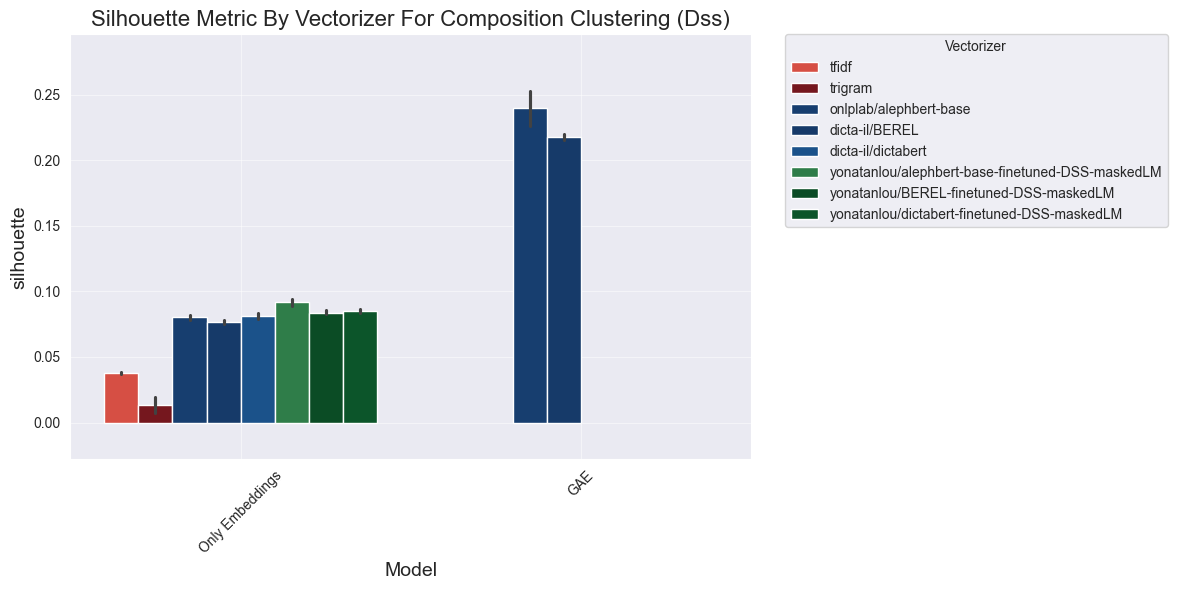

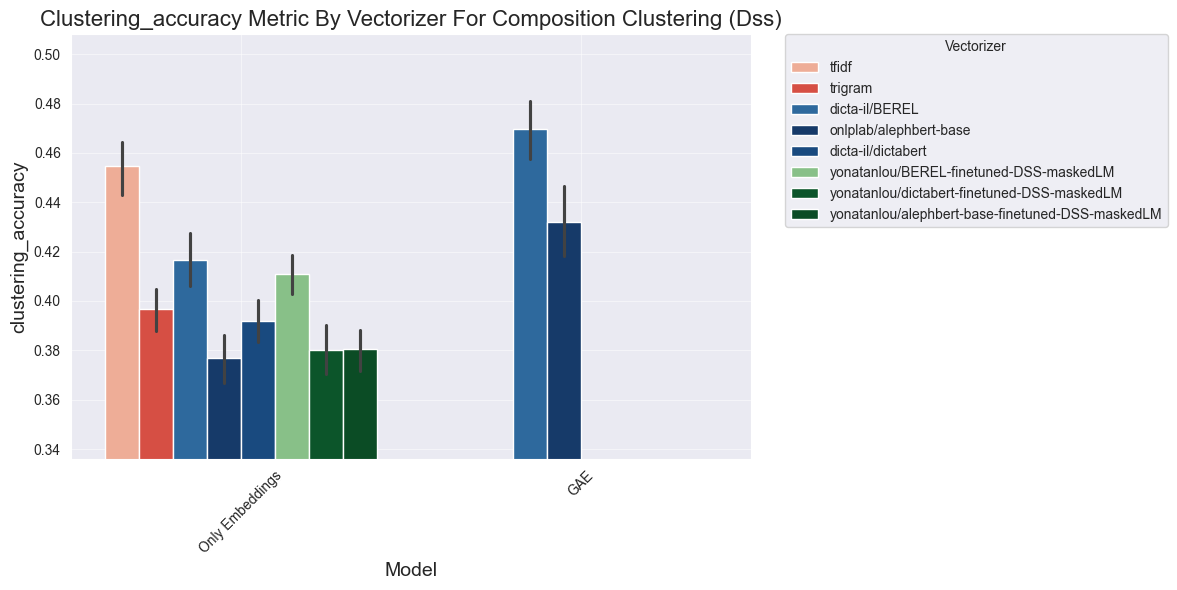

In [72]:
base_color_by_group = {
    'classic_text_features': "Reds",  # Red
    'pre_trained_bert': "Blues",  # Green
    'fine_tuned': "Greens"  # Blue
}

file_name = f"{BASE_DIR}/experiments/dss/gnn/comparsion_plot_all_tasks.png"
file_name = None
# hue_cols = list(all_results[all_results["model"]=="GCN"]["vectorizer"].unique())+["trigram"]


for main_metric in ["dasgupta", "jaccard", "silhouette",
                    "clustering_accuracy", 
                    ]:
    all_results = generate_all_results(compare_list, tasks, main_metric)
    all_results["vectorizer_type"] = all_results["vectorizer"].apply(get_group_by_vectorizer)
    color_map = generate_color_map(all_results, "vectorizer", "vectorizer_type", "RdYlGn", base_color_by_group)
    hue_cols = all_results["vectorizer"].unique()
    all_results = all_results[~all_results["vectorizer"].isin(["dicta-il/MsBERT", "starr"])]
    all_results = all_results[all_results["task"] != "section"]
    plot_obj = generate_bar_plot(all_results, "model", main_metric, "vectorizer", "vectorizer_type", color_map,
                                 filename=file_name, which_hue_cols=hue_cols, base_color_by_group=base_color_by_group)

In [16]:
# all_results
print(pd.pivot_table(all_results, index="model", columns="vectorizer", values="jaccard", aggfunc="mean").T.to_latex(float_format="%.2f"))

\begin{tabular}{lrr}
\toprule
model & GVAE & Only Embeddings \\
vectorizer &  &  \\
\midrule
dicta-il/BEREL & 0.20 & 0.17 \\
dicta-il/dictabert & 0.17 & 0.14 \\
onlplab/alephbert-base & 0.15 & 0.11 \\
tfidf & NaN & 0.15 \\
trigram & NaN & 0.11 \\
\bottomrule
\end{tabular}


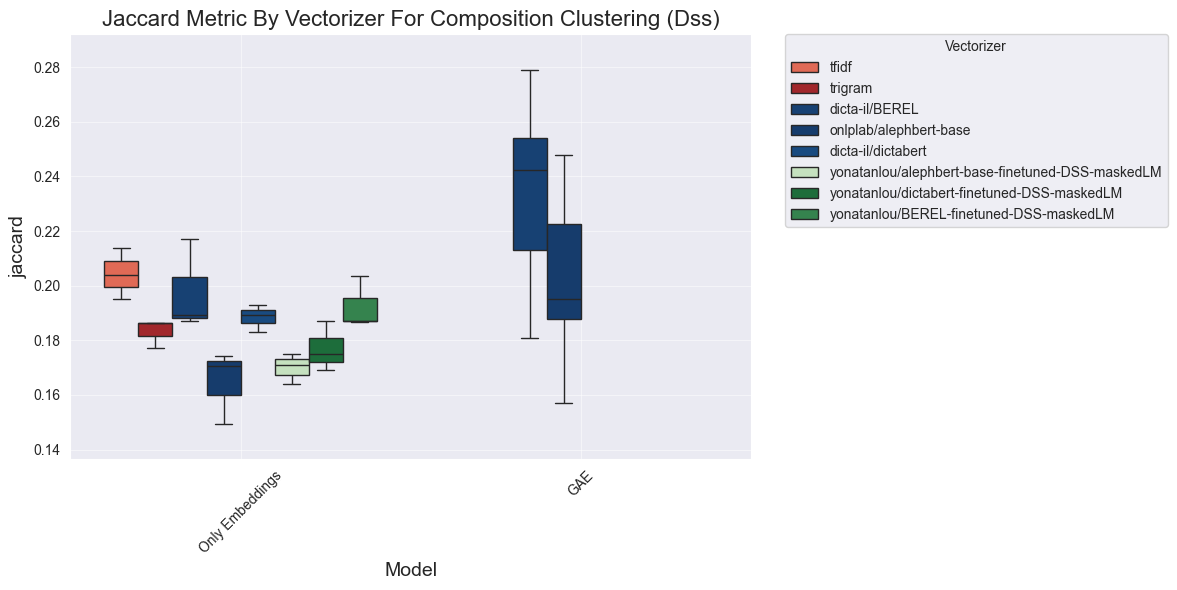

In [26]:
for main_metric in ["jaccard", 
                    ]:
    all_results = generate_all_results(compare_list, tasks, "silhouette")
    all_results["vectorizer_type"] = all_results["vectorizer"].apply(get_group_by_vectorizer)
    color_map = generate_color_map(all_results, "vectorizer", "vectorizer_type", "RdYlGn", base_color_by_group)
    hue_cols = all_results["vectorizer"].unique()
    all_results = all_results[~all_results["vectorizer"].isin(["dicta-il/MsBERT", "starr"])]
    all_results = all_results[all_results["task"] != "section"]
    plot_obj = generate_bar_plot(all_results, "model", main_metric, "vectorizer", "vectorizer_type", color_map,
                                 filename=file_name, which_hue_cols=hue_cols, base_color_by_group=base_color_by_group)

In [170]:

results_gnn = []
for task in [tasks[0]]:
    gnn = pd.read_csv(compare_list[task][1])
    gnn = gnn.rename(columns={"bert_model": "vectorizer"})

    gnn["model"] = "GVAE"
    gnn["task"] = task

    results_gnn.append(gnn.to_dict(orient="records"))

all_results_gnn = pd.DataFrame([item for sublist in results_gnn for item in sublist])
all_results_gnn

,silhouette,jaccard,dasgupta,clustering_accuracy,epoch,num_adjs,epochs,hidden_dim,latent_dim,distance,learning_rate,threshold,vectorizer,adj_type,num_edges,model,task
0,0.293326,0.168329,0.878987,0.420021,241,1,250,300,100,cosine,0.001,0.99,dicta-il/BEREL,tfidf,9391,GVAE,book
1,0.202097,0.068126,0.681619,0.259030,218,1,250,300,100,cosine,0.001,0.99,dicta-il/BEREL,starr,9391,GVAE,book
2,0.287793,0.144555,0.853637,0.379773,190,1,250,300,100,cosine,0.001,0.99,onlplab/alephbert-base,tfidf,9391,GVAE,book
3,0.217929,0.068954,0.672611,0.263158,219,1,250,300,100,cosine,0.001,0.99,onlplab/alephbert-base,starr,9391,GVAE,book
4,0.284269,0.169885,0.867883,0.414861,201,1,250,300,100,cosine,0.001,0.99,dicta-il/dictabert,tfidf,9391,GVAE,book
5,0.209466,0.073658,0.701846,0.266254,247,1,250,300,100,cosine,0.001,0.99,dicta-il/dictabert,starr,9391,GVAE,book
6,0.291661,0.169669,0.858932,0.403509,236,1,250,300,100,cosine,0.001,0.99,yonatanlou/BEREL-finetuned-DSS-maskedLM,tfidf,9391,GVAE,book
7,0.200047,0.068616,0.659600,0.252838,194,1,250,300,100,cosine,0.001,0.99,yonatanlou/BEREL-finetuned-DSS-maskedLM,starr,9391,GVAE,book
8,0.293478,0.153020,0.834853,0.395253,104,1,250,300,100,cosine,0.001,0.99,yonatanlou/alephbert-base-finetuned-DSS-maskedLM,tfidf,9391,GVAE,book
9,0.219694,0.072039,0.672632,0.270382,168,1,250,300,100,cosine,0.001,0.99,yonatanlou/alephbert-base-finetuned-DSS-maskedLM,starr,9391,GVAE,book


In [171]:

results_gnn = []
for task in tasks:
    gnn = pd.read_csv(compare_list[task][1])
    gnn = gnn.rename(columns={"bert_model": "vectorizer"})

    gnn["model"] = "GVAE"
    gnn["task"] = task

    results_gnn.append(gnn.to_dict(orient="records"))

all_results_gnn = pd.DataFrame([item for sublist in results_gnn for item in sublist])

MAIN_METRIC = "jaccard"
all_results_gnn[all_results_gnn["model"] == "GVAE"].sort_values(by=MAIN_METRIC, ascending=False).groupby("task").head(
    2).sort_values(by="vectorizer")

,silhouette,jaccard,dasgupta,clustering_accuracy,epoch,num_adjs,epochs,hidden_dim,latent_dim,distance,learning_rate,threshold,vectorizer,adj_type,num_edges,model,task
4,0.284269,0.169885,0.867883,0.414861,201,1,250,300,100,cosine,0.001,0.99,dicta-il/dictabert,tfidf,9391,GVAE,book
6,0.291661,0.169669,0.858932,0.403509,236,1,250,300,100,cosine,0.001,0.99,yonatanlou/BEREL-finetuned-DSS-maskedLM,tfidf,9391,GVAE,book


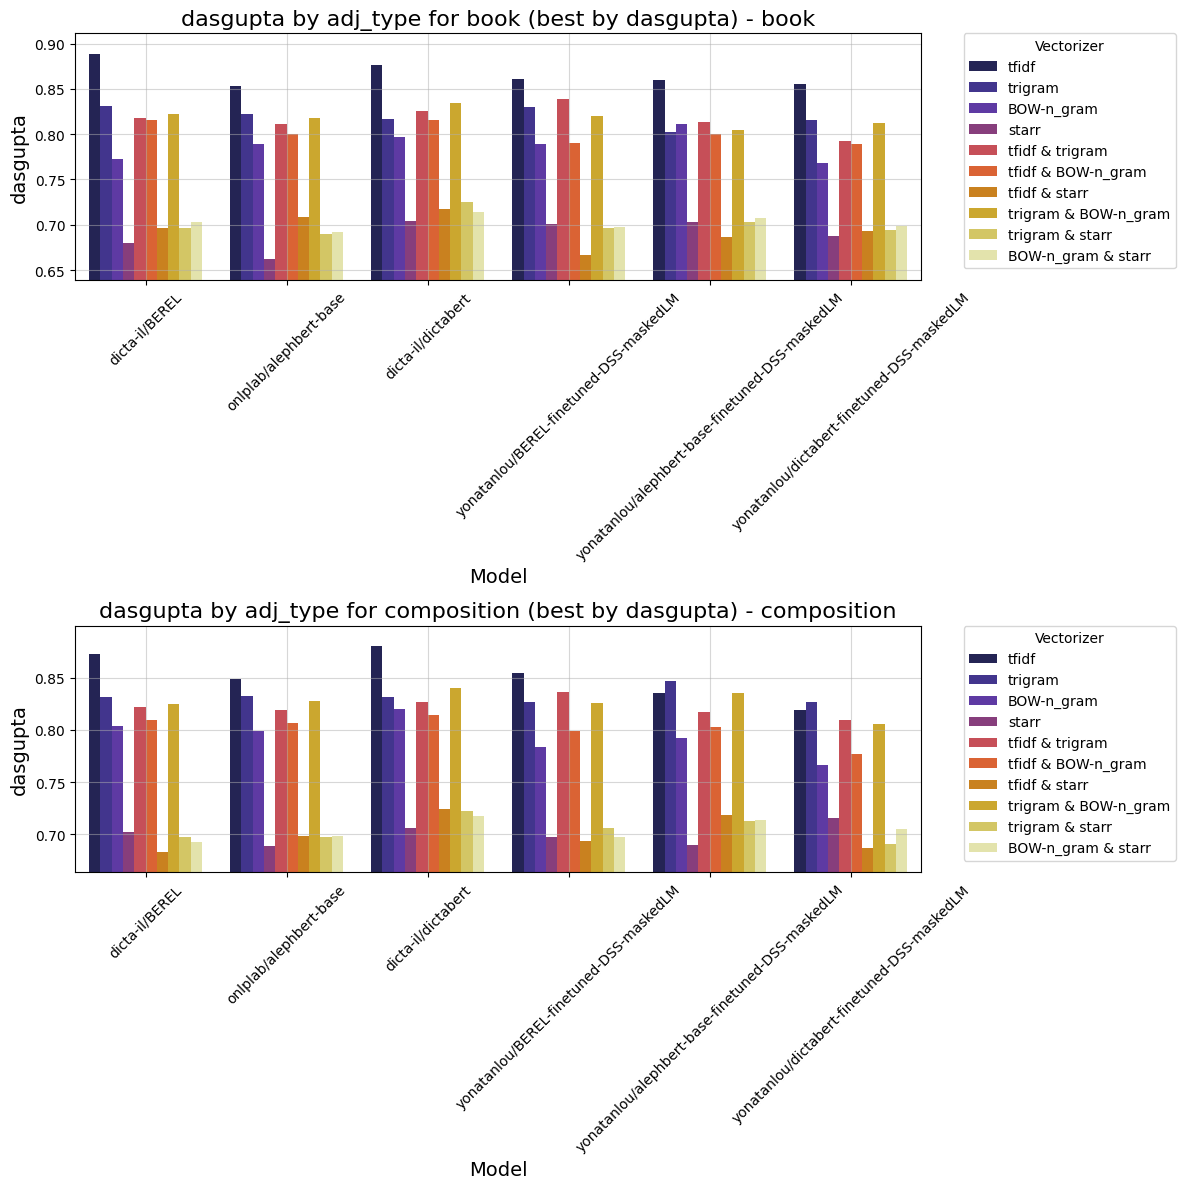

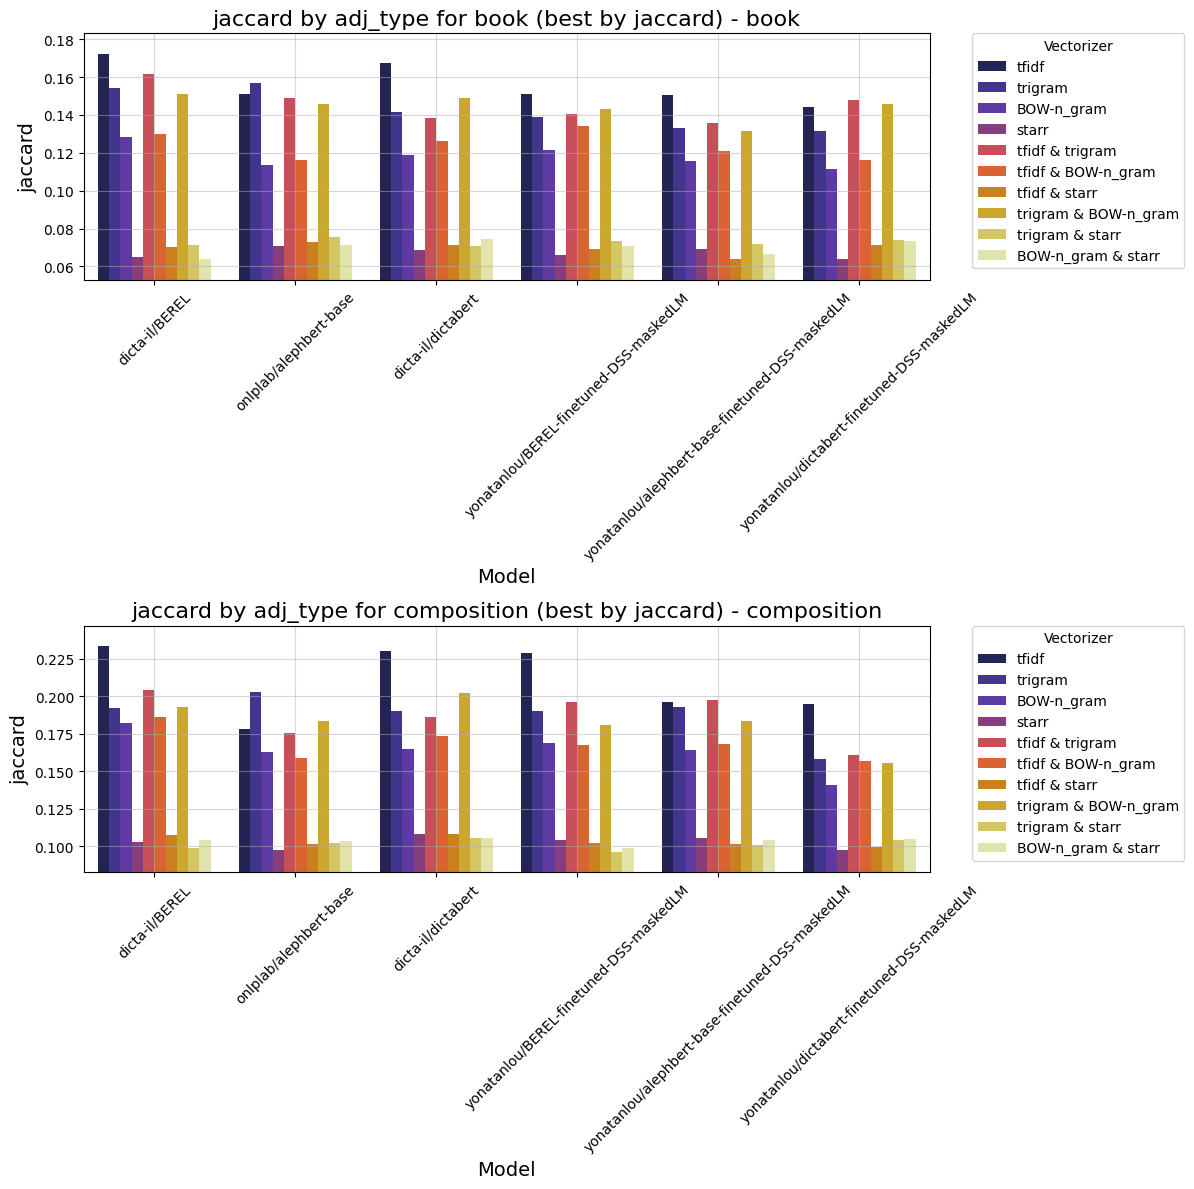

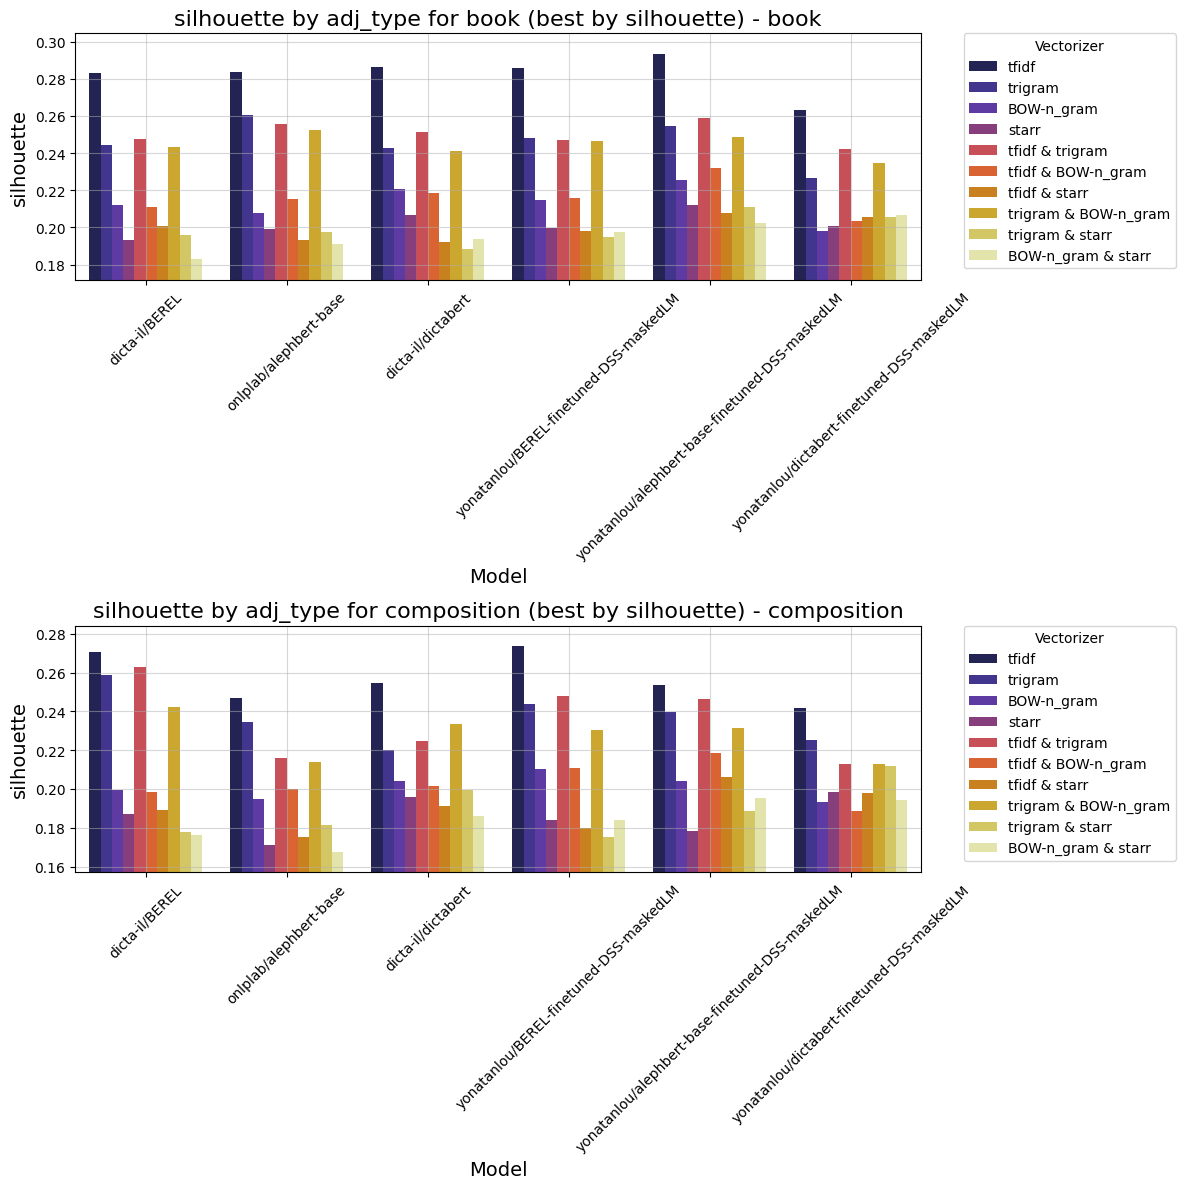

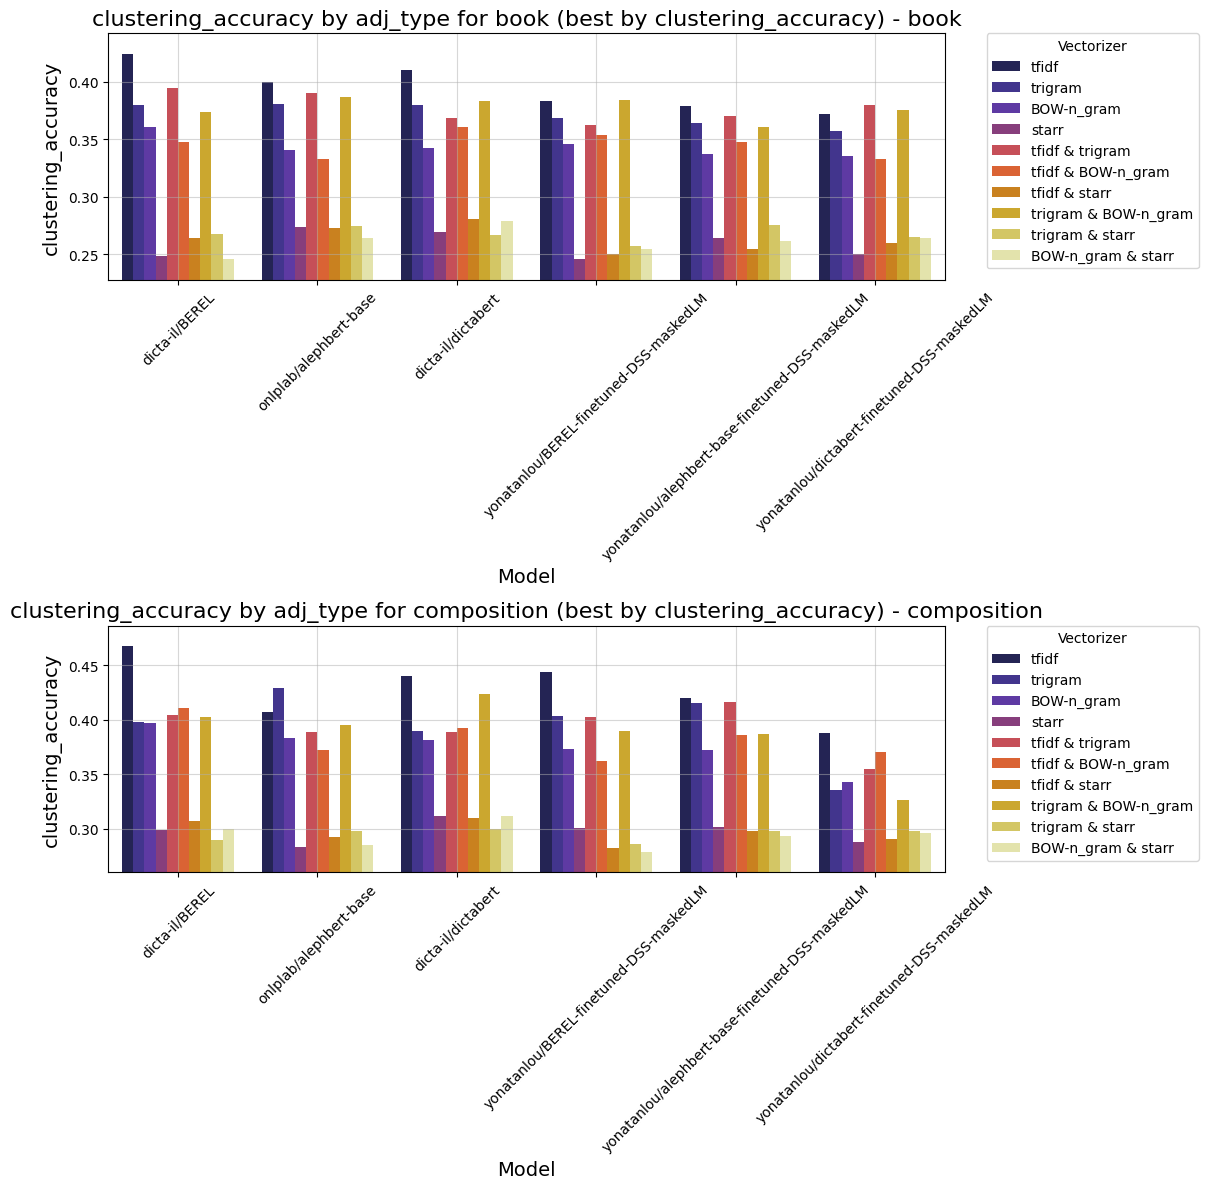

In [77]:
adj_types = all_results_gnn['adj_type'].unique()
palette = sns.color_palette("CMRmap", len(adj_types))
color_dict = dict(zip(adj_types, palette))
# file_name = f"{BASE_DIR}/experiments/dss/gnn/comparsion_plot_all_tasks_different_adj.png"
file_name = None
for metric in ["dasgupta", "jaccard", "silhouette", "clustering_accuracy", ]:
    generate_bar_plot(all_results_gnn, "vectorizer", metric, "adj_type", "num_adjs", color_dict, filename=file_name,
                      which_hue_cols=None)